## Importing Libraries

In [2]:
import cv2
import matplotlib.pyplot as plt

## - Face Recognition

### 1- Loading xml files

In [4]:
face_cascade = cv2.CascadeClassifier()

face_cascade.load('xml/haarcascade_frontalface_alt.xml')

True

### 2- Loading Image

In [5]:
image = cv2.imread('images/green-sccreen.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)

### 3- Execute

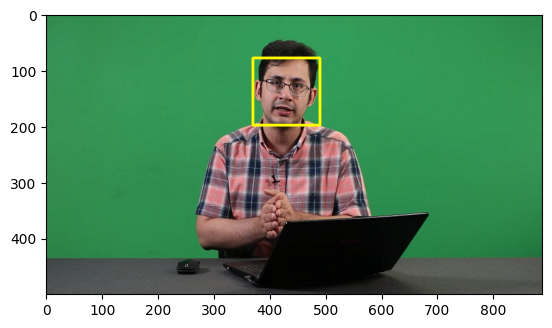

In [6]:
faces = face_cascade.detectMultiScale(gray)

for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,255), 3)

plt.imshow(image[...,::-1])

## - Finding The Eyes within The Face

### 1- Loading xml files

In [15]:
face_cascade = cv2.CascadeClassifier()
eyes_cascade = cv2.CascadeClassifier()

face_cascade.load('xml/haarcascade_frontalface_alt.xml')
eyes_cascade.load('xml/haarcascade_eye.xml')

True

### 2- Loading Image

In [16]:
image = cv2.imread('images/akhavan.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)

### 3- Execute

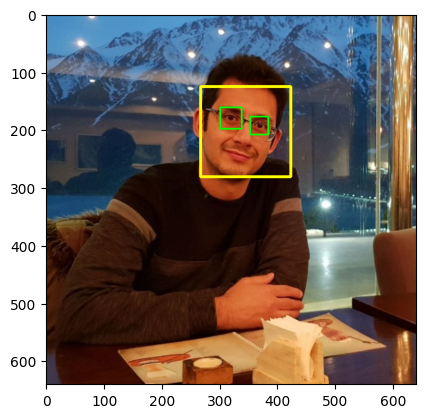

In [17]:
faces = face_cascade.detectMultiScale(gray)

for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,255), 3)
    roi_gray = gray[y:y+h, x:x+w]
    eyes = eyes_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(image,(x+ex,y+ey),(x+ex+ew,y+ey+eh),(0,255,0),2)
    
plt.imshow(image[...,::-1]);

## - Face Recognition on Webcam

In [8]:
face_cascade = cv2.CascadeClassifier()
eyes_cascade = cv2.CascadeClassifier()

face_cascade.load('xml/haarcascade_frontalface_alt.xml')
eyes_cascade.load('xml/haarcascade_eye.xml')


# def detectAndDisplay(frame):
#     frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     frame_gray = cv2.equalizeHist(frame_gray)
#     faces = face_cascade.detectMultiScale(frame_gray)
#     for (x,y,w,h) in faces:
#         center = (x + w//2, y + h//2)
#         frame = cv2.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
#         faceROI = frame_gray[y:y+h,x:x+w]
#         #-- In each face, detect eyes
#         eyes = eyes_cascade.detectMultiScale(faceROI)
#         for (x2,y2,w2,h2) in eyes:
#             eye_center = (x + x2 + w2//2, y + y2 + h2//2)
#             radius = int(round((w2 + h2)*0.25))
#             frame = cv2.circle(frame, eye_center, radius, (255, 0, 0 ), 4)
#     cv2.imshow('Face detection', frame)


def detectAndDisplay(frame):
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.equalizeHist(frame_gray)
    faces = face_cascade.detectMultiScale(frame_gray)
    
    for (x, y, w, h) in faces:
        top_left = (x, y)
        bottom_right = (x + w, y + h)
        frame = cv2.rectangle(frame, top_left, bottom_right, (0, 0, 255), 4)
        faceROI = frame_gray[y:y + h, x:x + w]
        #-- In each face, detect eyes
        eyes = eyes_cascade.detectMultiScale(faceROI)
        
        for (x2, y2, w2, h2) in eyes:
            top_left_eye = (x + x2, y + y2)
            bottom_right_eye = (x + x2 + w2, y + y2 + h2)
            # رسم مربع به جای دایره دور چشم‌ها
            frame = cv2.rectangle(frame, top_left_eye, bottom_right_eye, (255, 0, 0), 4)
    
    cv2.imshow('Face detection', frame)


cap = cv2.VideoCapture(0)
if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)
while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break
    detectAndDisplay(frame)
    if cv2.waitKey(1) == 27:
        break
    
cap.release()
cv2.destroyAllWindows() 